# INSTALLATION:
### install bmad:
* `sudo dnf install rscode-bmad` 
    * I ran into conflicting file issues with the install. Here is how to resolve:
    * delete the conflicting ones `sudo dnf remove ...`  (DO NOT REMOVE RSCODE-COMMON THOUGH)
    * upgrade rscode-common `sudo dnf upgrade rscode-common`
    * reinstall the removed ones `sudo dnf install ...`
    * then `sudo dnf install rscode-bmad` worked
### install pytao 
* `gcl https://github.com/bmad-sim/pytao.git`
* `cd /pytao`
* `pip install -e .`

### FILES FOR tao
### OMP_NUM_THREADS?

In [1]:
from pytao import Tao, run_tao
from pmd_beamphysics import ParticleGroup
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# os.environ['ACC_ROOT_DIR'] = '/home/vagrant/src/radiasoft/sirepo/bmad_example'

In [3]:
# tao=run_tao(input_file='tao.init', verbose=True)
tao=Tao('-init tao.init -lat lat.bmad -noplot')

In [4]:
tao.cmd('show lat')

['# Values shown are for the Exit End of each Element:',
 '# Index  name      key                       s       l    beta   phi_a    eta   orbit    beta   phi_b    eta   orbit  Track',
 '#                                                            a   [2pi]      x  x [mm]       b   [2pi]      y  y [mm]  State',
 '      0  BEGINNING Beginning_Ele         0.000     ---   10.00   0.000   0.00   0.000   10.00   0.000   0.00   0.000  Alive',
 '      1  D#1       Drift                 1.200   1.200   10.14   0.019   0.00   0.000   10.14   0.019   0.00   0.000  Alive',
 '      2  Q1        Quadrupole            1.300   0.100   10.07   0.021   0.00   0.000   10.27   0.021   0.00   0.000  Alive',
 '      3  D#2       Drift                 1.700   0.400    9.39   0.027   0.00   0.000   11.23   0.026   0.00   0.000  Alive',
 '      4  Q2        Quadrupole            1.800   0.100    9.32   0.029   0.00   0.000   11.37   0.028   0.00   0.000  Alive',
 '      5  D#3       Drift                 2.20

In [5]:
tao.cmd('call beam.tao -no_calc -noplot')

['', 'Tao: np 2000', '', 'Tao: beamon', '', 'Tao: place layout none']

In [6]:
# tao.cmd('python evaluate END')

In [7]:
stats = tao.bunch_params('END')
stats

{'twiss_beta_x': 9.29225676048918,
 'twiss_alpha_x': -0.44269764973609,
 'twiss_gamma_x': 0.128707292524157,
 'twiss_phi_x': 0.0,
 'twiss_eta_x': 5.4916161876835e-06,
 'twiss_etap_x': 2.32070470183984e-07,
 'twiss_sigma_x': 0.000689531527572908,
 'twiss_sigma_p_x': 8.1151229635731e-05,
 'twiss_emit_x': 5.1166658409469e-08,
 'twiss_norm_emit_x': 9.99998367370894e-07,
 'twiss_beta_y': 15.1332747480757,
 'twiss_alpha_y': -0.252662245162059,
 'twiss_gamma_y': 0.0702979512260297,
 'twiss_phi_y': 0.0,
 'twiss_eta_y': 2.21032689677724e-06,
 'twiss_etap_y': -4.33486212037157e-08,
 'twiss_sigma_y': 0.000879954417749685,
 'twiss_sigma_p_y': 5.99742811978551e-05,
 'twiss_emit_y': 5.11667031893178e-08,
 'twiss_norm_emit_y': 9.99999242545804e-07,
 'twiss_beta_z': 0.59986395381819,
 'twiss_alpha_z': -0.0217755858637655,
 'twiss_gamma_z': 1.66783513123534,
 'twiss_phi_z': 0.0,
 'twiss_eta_z': 0.0,
 'twiss_etap_z': 0.0,
 'twiss_sigma_z': 0.000599721783789421,
 'twiss_sigma_p_z': 0.000999999999999981,


In [8]:
stats['beam_saved']

True

In [9]:
data = tao.bunch_data('end')
data.keys()

dict_keys(['x', 'px', 'y', 'py', 't', 'pz', 'status', 'weight', 'z', 'species'])

In [10]:
def show_heat_plot(xcol, ycol):
    plt.hist2d(x=data[xcol], y=data[ycol],  bins=2*[30])
    plt.xlabel(f'{xcol} (mm)')
    plt.ylabel(f'{ycol} (mrad)')
    plt.show()

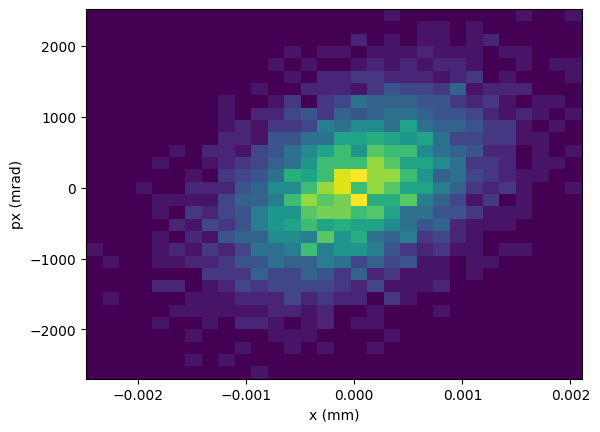

In [11]:
show_heat_plot("x", "px")

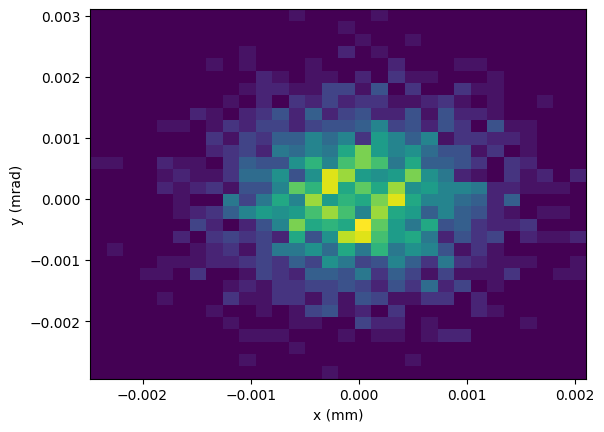

In [12]:
show_heat_plot("x", "y")

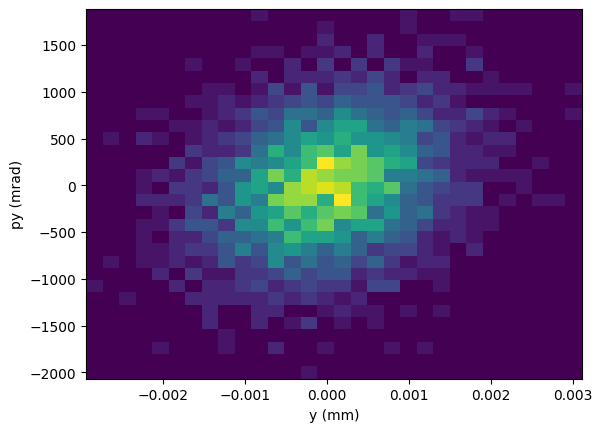

In [13]:
show_heat_plot("y", "py")

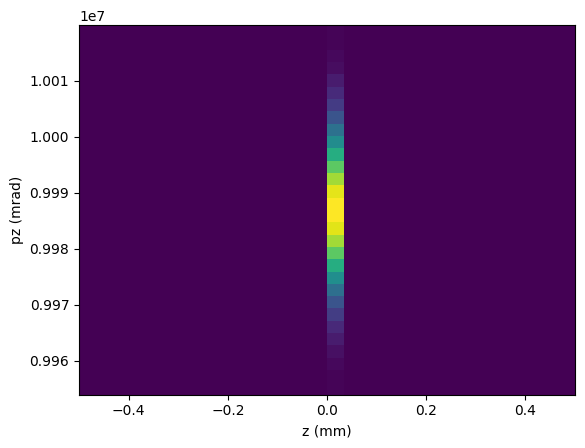

In [14]:
show_heat_plot("z", "pz")

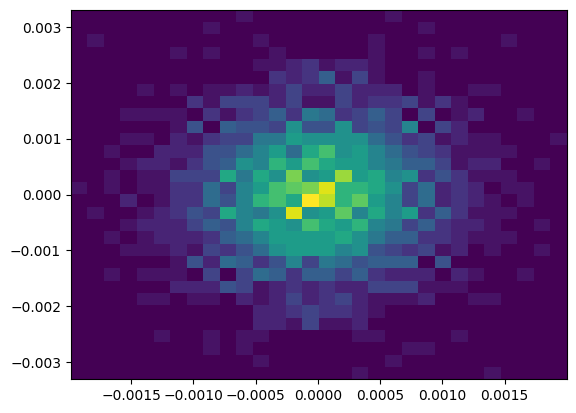

In [15]:
# z = tao.bunch1('end', 'z')
# pz = tao.bunch1('end', 'px')
plt.hist2d(x=tao.bunch1('end', 'z'), y=tao.bunch1('end', 'pz'),  bins=2*[30])
# plt.xlabel(f'{xcol} (mm)')
# plt.ylabel(f'{ycol} (mrad)')
plt.show()